# Exploratory Data Analysis di E-Commerce

# Problem

- Perusahaan ingin meningkatkan penjualan pada kuartal selanjutnya

# Goals

- Mencari category terbawah berdasarkan perc_of_unit_sold untuk dilakukan promosi dan iklan
- Mencari faktor dan penyebab kurangnya penjualan

### Import Package

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Read Data

In [4]:
data = pd.read_csv("ecommerce.csv")

In [4]:
data.head(10)

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men
5,5,Athletic Shoes,"Nike Sport Sneaker Shoes for Men , 44 EU , White",319.0,234.99,30.0,NaN,FREE Shipping,men
6,6,Athletic Shoes,Adidas Duramo 9 Running Shoes For Men - Core B...,319.0,233.98,68.0,100.0,FREE Shipping,men
7,7,Athletic Shoes,"Nike Fitness Shoes For Men , 44.5 EU , Gray",389.0,280.98,71.0,NaN,FREE Shipping,men
8,8,Athletic Shoes,Nike Air Zoom Pegasus 36 Running Sneakers for ...,609.0,470.99,60.0,NaN,FREE Shipping,men
9,9,Athletic Shoes,"Nike Court Lite 2 Sneaker for Men , Size 42 EU...",339.0,236.99,33.0,NaN,FREE Shipping,men


##### Deskripsi Kolom

## Describe Data

In [15]:
data.shape

(609, 9)

- Ada 609 baris dan 9 kolom

In [6]:
data.columns

Index(['Unnamed: 0', 'category', 'product', 'Original_price', 'price',
       'perc_of_unit_sold', 'rating', 'shpping_rate', 'gender'],
      dtype='object')

In [9]:
dataDesc = []

for i in data.columns:
    dataDesc.append([
        i,
        data[i].dtypes,
        data[i].isnull().sum(),
        round((((data[i].isnull().sum()) / (len(data))) *100), 2),
        data[i].nunique(),
        data[i].drop_duplicates().sample(2).values
    ])

In [10]:
pd.DataFrame(dataDesc, columns = [
    "Data Feature",
    "Data types",
    "Null",
    "Null Percentage",
    "Unique",
    "Nunique"
])

,Data Feature,Data types,Null,Null Percentage,Unique,Nunique
0,Unnamed: 0,int64,0,0.00,180,"[96, 175]"
1,category,object,0,0.00,7,"[Casual & Dress Shoes, Athletic Shoes]"
2,product,object,0,0.00,602,[Ferrari Redrev T Men's Black Dial Stainless S...
3,Original_price,float64,26,4.27,322,"[329.0, 3124.0]"
4,price,float64,0,0.00,457,"[84.6, 100.49]"
5,perc_of_unit_sold,float64,87,14.29,92,"[42.0, 92.0]"
6,rating,float64,182,29.89,24,"[76.0, 92.0]"
7,shpping_rate,object,42,6.90,2,"[Eligible for FREE Shipping, FREE Shipping]"
8,gender,object,28,4.60,3,"[nan, women]"


- Data Types sudah sesuai semua
- Ada missing Value di 5 variable :
    - Original_price
    - perc_of_unit_sold
    - rating
    - shpping_rate
    - gender

## Drop Kolom

- Menghapus kolom yang tidak digunakan dalam analisa data
- Menghapus kolom Unnamed: 0

## Handling Missing Value

## Cek Duplikasi Data

In [25]:
data[data.duplicated()]

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender


In [26]:
print(data.duplicated().value_counts())

False    609
dtype: int64


- **Sudah tidak ada data duplikat**

## Analisa Data

## Persentase Produk Terjual per Category

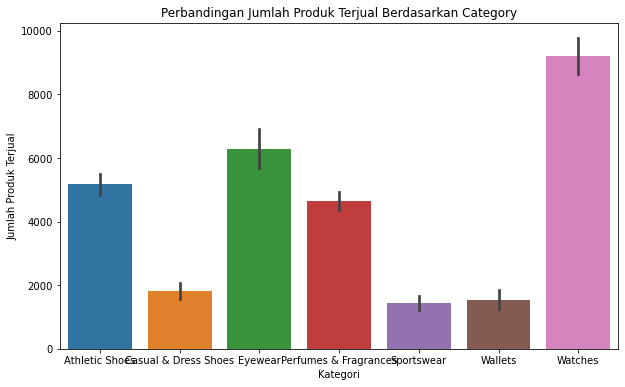

In [26]:
plt.figure(figsize= (10,6))
sns.barplot(data["category"], data["perc_of_unit_sold"], estimator = sum)
plt.title("Perbandingan Jumlah Produk Terjual Berdasarkan Category")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Produk Terjual")
plt.show()

 - Watches dan Eyewear menjadi 2 kategori dengan presentase penjualan teratas
 - Sedangkan Sportswear, Wallets dan Casual & Dress Shoes menjadi 3 kategori paling bawah dalam presentase penjualan

## Persentase Produk Terjual per Category Berdasarkan Gender

In [28]:
pd.crosstab(index=data["gender"], columns=data["category"], values=data["perc_of_unit_sold"], aggfunc="count")

category,Athletic Shoes,Casual & Dress Shoes,Eyewear,Perfumes & Fragrances,Sportswear,Wallets,Watches
gender,,,,,,,
Unisex,1.0,NaN,66.0,5.0,NaN,1.0,5.0
men,59.0,32.0,43.0,24.0,13.0,23.0,95.0
women,20.0,3.0,13.0,33.0,12.0,5.0,47.0


# men

In [5]:
data_men = data[data["gender"] == "men"]

In [43]:
pd.crosstab(index=data_men["gender"], columns=data_men["category"], values=data_men["perc_of_unit_sold"], aggfunc="count")

category,Athletic Shoes,Casual & Dress Shoes,Eyewear,Perfumes & Fragrances,Sportswear,Wallets,Watches
gender,,,,,,,
men,59,32,43,24,13,23,95


# women

In [40]:
data_women = data[data["gender"] == "women"]

In [41]:
pd.crosstab(index=data_women["gender"], columns=data_women["category"], values=data_women["perc_of_unit_sold"], aggfunc="count")

category,Athletic Shoes,Casual & Dress Shoes,Eyewear,Perfumes & Fragrances,Sportswear,Wallets,Watches
gender,,,,,,,
women,20,3,13,33,12,5,47


#### men
A. Tertinggi
1. Watches
2. Athletic Shoes
3. Eyewear

A. Terendah
1. Sportswear
2. Wallets
3. Perfumes & Fragrances

#### women
A. Tertinggi
1. Watches
2. Perfumes & Fragrances
3. Athletic Shoes

B. Terendah
1. Casual & Dress Shoes
2. Wallet
3. Sportswear



**Jika dikelompokkan berdasarkan gender:**
1. **Watches dan Athletic Shoes menempati urutan paling atas**
2. **Sportswear dan Wallets menempati urutan paling bawah baik "men" ataupun "women"**


In [11]:
pd.crosstab(index=data["category"], columns="Variasi Product", values=data["product"], aggfunc="count")

col_0,Variasi Product
category,
Athletic Shoes,95
Casual & Dress Shoes,47
Eyewear,154
Perfumes & Fragrances,63
Sportswear,33
Wallets,37
Watches,180


In [28]:
pd.crosstab(index=data["category"], columns="product", values=data["perc_of_unit_sold"], aggfunc="sum")

col_0,product
category,
Athletic Shoes,5170.0
Casual & Dress Shoes,1821.0
Eyewear,6280.0
Perfumes & Fragrances,4649.0
Sportswear,1432.0
Wallets,1538.0
Watches,9218.0


**Jika dilihat dari variasi product pada setiap category:**
- **Watches dan Eyewear memiliki variasi product terbanyak**
- **Sportswear memiliki variasi product paling sedikit**

In [16]:
data["category"].value_counts()

Watches                  180
Eyewear                  154
Athletic Shoes            95
Perfumes & Fragrances     63
Casual & Dress Shoes      47
Wallets                   37
Sportswear                33
Name: category, dtype: int64

- **category "watches & eyewear" menjadi 2 teratas paling banyak dibeli**
- **sedangkan "wallet & sportswear" menjadi 2 terendah dalam penjualan**

In [12]:
pd.crosstab(data["gender"], columns = "Jumlah")

col_0,Jumlah
gender,
Unisex,88
men,338
women,155


- **Jumlah "men" mendominasi transaksi dengan total 338**

## Melihat Faktor-faktor Yang Berpengaruh Dalam Penjualan

## 1. PENGIRIMAN

In [18]:
pd.crosstab(data["shpping_rate"], columns = "Jumlah")

col_0,Jumlah
shpping_rate,
Eligible for FREE Shipping,211
FREE Shipping,356


- **Jika dilihat dari data, penjualan dengan kategori "FREE Shipping" lebih tinggi dengan 356 total penjualan dibandingkan dengan "Eligible for FREE Shipping" yang hanya 211 total penjualan**

In [11]:
(pd.crosstab(data["shpping_rate"], columns = data["gender"], normalize="all") *100).round(2)

gender,Unisex,men,women
shpping_rate,,,
Eligible for FREE Shipping,3.69,20.48,12.36
FREE Shipping,11.81,37.64,14.02


- **Semua gender cenderung melakukan transaksi jika produk yang di jual "FREE Shipping"**

## 2. DISKON

- **Membuat kolom "diskon"**
- Bertujuan untuk mengetahui besaran diskon yang diberikan untuk setiap product/ category

In [21]:
data["diskon"] = round((data['Original_price'] - data['price']) / data['Original_price'] *100)

In [22]:
data.head()

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender,diskon
0,0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men,29.0
1,1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men,17.0
2,2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women,19.0
3,3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men,34.0
4,4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men,25.0


In [26]:
pd.crosstab(data["category"], columns="Rata-rata diskon", values=data["diskon"], aggfunc="mean")

col_0,Rata-rata diskon
category,
Athletic Shoes,31.954545
Casual & Dress Shoes,38.021277
Eyewear,52.357143
Perfumes & Fragrances,62.983607
Sportswear,43.483871
Wallets,50.162162
Watches,52.684848


# INSIGHT

- **Watches dan Eyewear menjadi 2 kategori dengan presentase penjualan teratas**
- **Sedangkan Sportswear, Wallets dan Casual & Dress Shoes menjadi 3 kategori paling bawah dalam presentase penjualan**


   - **Jika dikelompokkan berdasarkan gender:**
1. **Watches dan Athletic Shoes menempati urutan paling atas**
2. **Sportswear dan Wallets menempati urutan paling bawah baik "men" ataupun "women"**



   - **Variasi product mempengaruhi tingkat penjualan:**
1. **Terbukti Penjualan dengan presentase teratas memiliki banyak variasi produk**
2. **Watches: 180 dan Eyewear: 154 variasi**

- **Pengiriman dengan "FREE Shipping" lebih mendominasi jumlah transaksi**

- **Besaran harga before-after rata-rata hampir sama**

# Rekomendasi

- **Melakukan promosi untuk category dengan penjualan terendah, yaitu sportswear dan wallet**
- **Menambah jumlah variasi product di category dengan penjualan terendah, karena tingkat variasi product mempengaruhi penjualan**